In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [3]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train_full.shape


(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

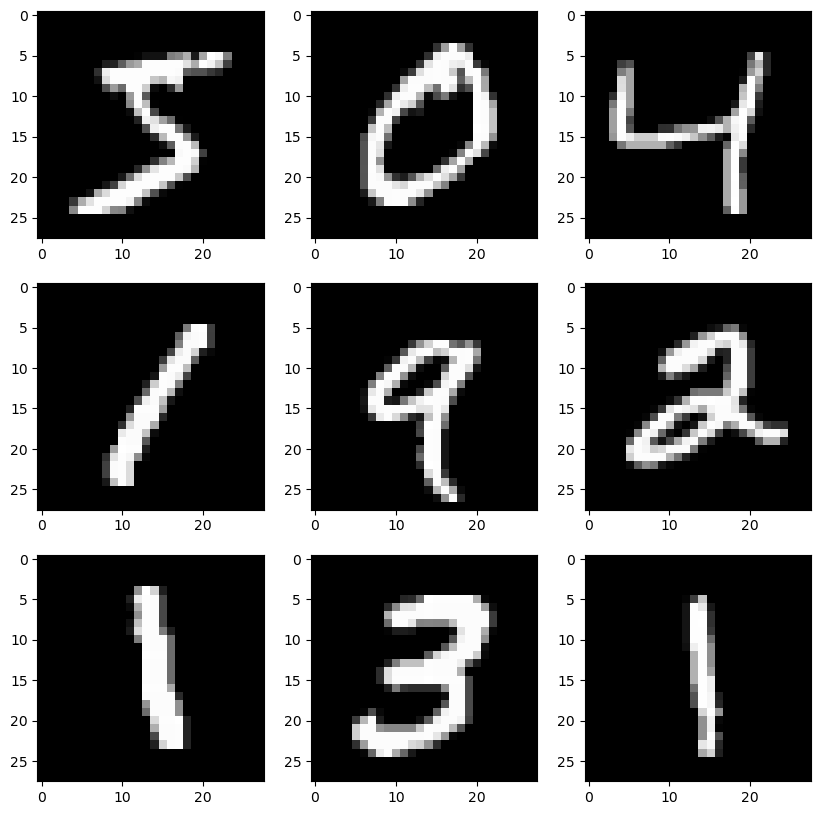

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [8]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [9]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [12]:
class_names[y_train[8]]

'9'

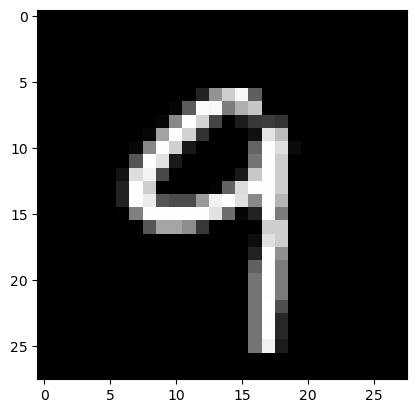

In [13]:
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#Sigmoid: probabilities produced by a Sigmoid are independent.
#Softmax: the outputs are interrelated. The sum of all outputs are 1.
        

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers


In [17]:
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/#available-optimizers
# https://keras.io/api/metrics/

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [18]:
X_train.shape


(55000, 28, 28)

In [19]:
# batch = The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
# epochs = how many times to do a pass over all the dataset

# https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32) # also possible to use validation_

Epoch 1/30
1719/1719 [==============================] - 17s 8ms/step - loss: 0.6168 - accuracy: 0.8407 - val_loss: 0.3067 - val_accuracy: 0.9148
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2915 - accuracy: 0.9160 - val_loss: 0.2378 - val_accuracy: 0.9338
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2381 - accuracy: 0.9313 - val_loss: 0.1999 - val_accuracy: 0.9444
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2031 - accuracy: 0.9421 - val_loss: 0.1813 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1769 - accuracy: 0.9504 - val_loss: 0.1594 - val_accuracy: 0.9568
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1565 - accuracy: 0.9561 - val_loss: 0.1447 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1401 - accuracy: 0.9603 - val_loss: 0.1326 - val_ac

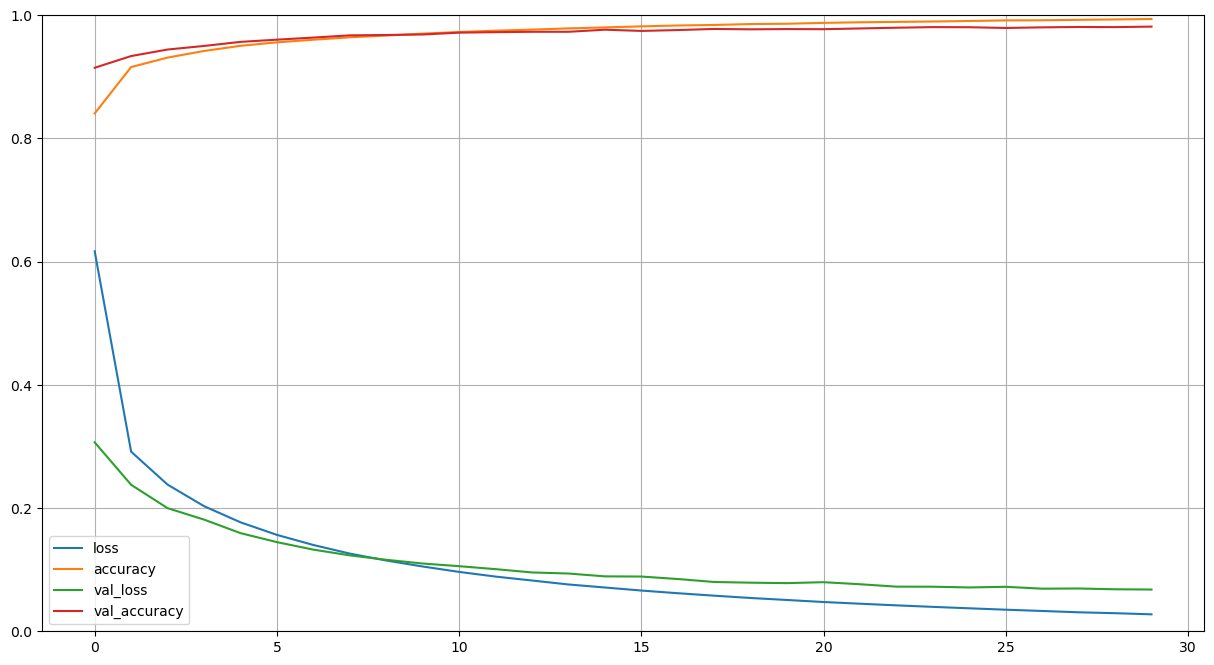

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 2s 6ms/step - loss: 0.0686 - accuracy: 0.9789


[0.06861946731805801, 0.9789000153541565]

In [22]:
model.predict(X_test)


313/313 [==============================] - 2s 5ms/step


array([[4.73672117e-06, 1.74340926e-07, 5.98466249e-05, ...,
        9.99794781e-01, 3.40100223e-06, 3.17428348e-05],
       [1.18439587e-07, 9.83410428e-06, 9.99972582e-01, ...,
        1.68803881e-13, 6.26293058e-06, 6.41069500e-13],
       [1.81947496e-06, 9.98449802e-01, 4.60273441e-04, ...,
        1.89568615e-04, 5.98707702e-04, 1.22913407e-05],
       ...,
       [2.12349496e-11, 3.02690373e-11, 1.07433278e-10, ...,
        1.91351575e-07, 4.03239625e-07, 3.11437111e-06],
       [1.89112619e-08, 1.45308015e-08, 1.78207518e-10, ...,
        3.30629440e-10, 6.47410634e-05, 4.82996587e-10],
       [3.03563496e-07, 1.29574895e-09, 1.15803559e-07, ...,
        4.44165077e-13, 7.59878827e-09, 2.84106155e-10]], dtype=float32)

In [23]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)


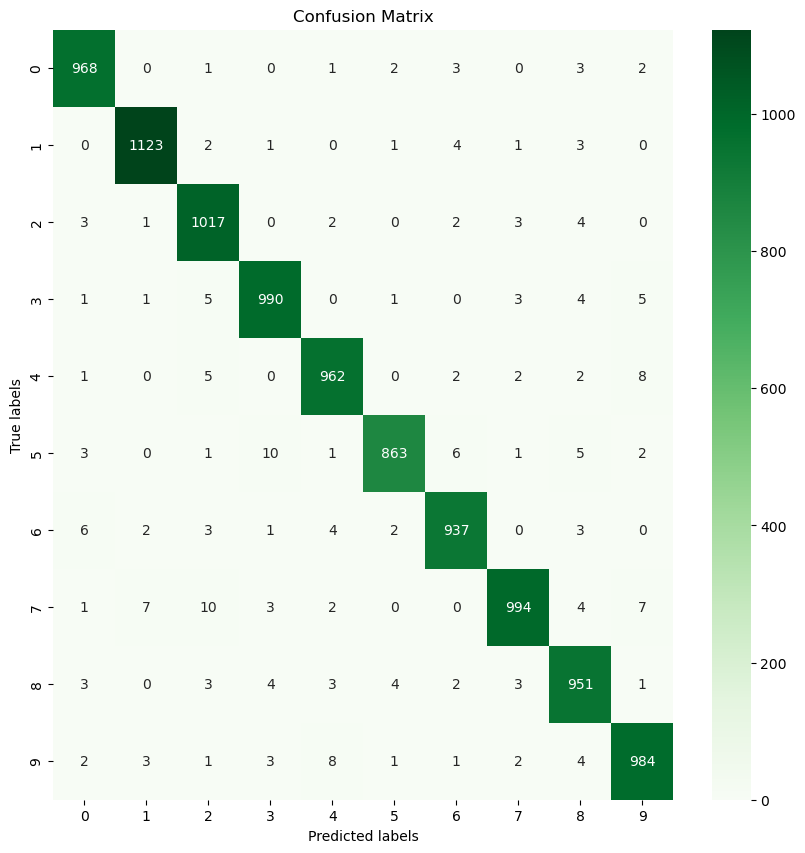

In [25]:
import seaborn as sb    

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()
